<a href="https://colab.research.google.com/github/Dice128/2025_VISIKOMPUTER_TI-2B/blob/main/Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langkah Praktikum
## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana
ayangkan Anda baru pertama kali mengenalkan komputer pada dunia visual. Sebelum
komputer bisa mengenali gambar kompleks seperti mobil atau wajah manusia, mari kita
ajarkan dulu konsep sederhana: mengenali angka tulisan tangan. Dataset MNIST yang berisi
digit 0–9 adalah titik awal yang bagus.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


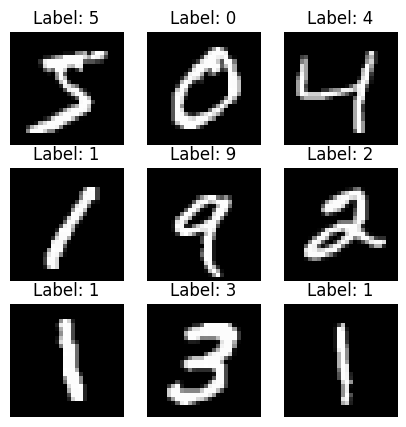

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

### Tugas Kecil
Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak
contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

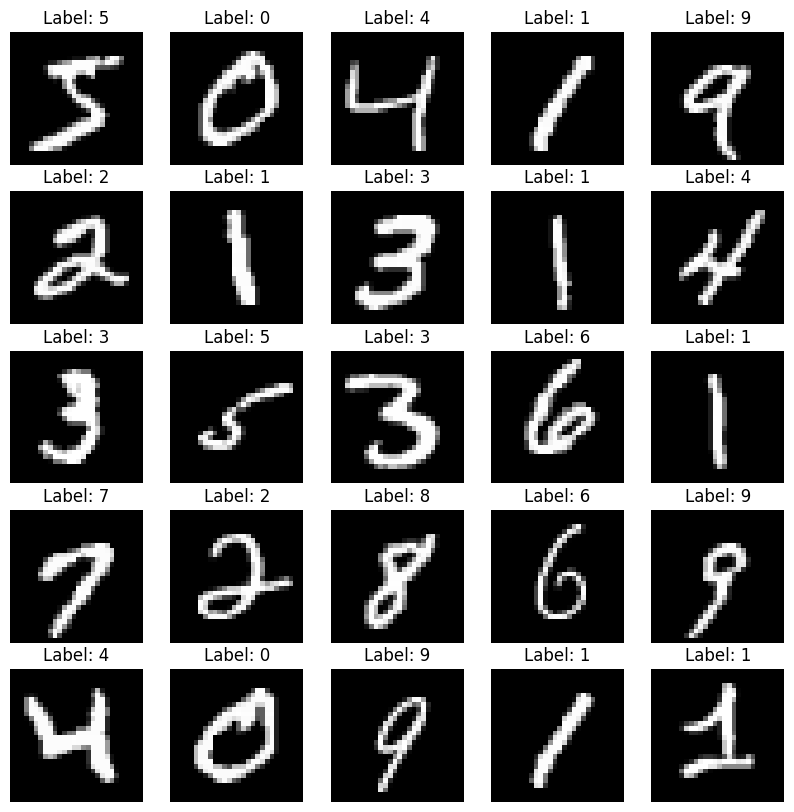

In [3]:
import matplotlib.pyplot as plt

# Asumsikan x_train dan y_train sudah ada
# (x_train, y_train), _ = mnist.load_data()

plt.figure(figsize=(10,10)) # Ukuran figure bisa diperbesar agar gambar tidak terlalu kecil
for i in range(25):
  # DIUBAH: Grid diperbesar menjadi 5x5 agar muat 25 gambar
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional
Sebelum CNN populer, pendekatan klasik digunakan. Mari kita coba Support Vector
Machine (SVM). Dataset yang kita pakai tetap MNIST, tapi gambar harus diubah menjadi
vektor 1D.

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print(f"Akurasi SVM: {accuracy_score(y_test, y_pred):.4f}")

Akurasi SVM: 0.9101


### Tugas Kecil
Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap
akurasi?

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print(f"Akurasi SVM: {accuracy_score(y_test, y_pred):.4f}")

Akurasi SVM: 0.9513


Praktikum D3 - Membangun CNN Sederhana
Sekarang saatnya mencoba Convolutional Neural Network. CNN akan belajar mengenali pola dari gambar MNIST secara otomatis.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.8956 - loss: 0.3510 - val_accuracy: 0.9813 - val_loss: 0.0678
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9804 - loss: 0.0649 - val_accuracy: 0.9858 - val_loss: 0.0548
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9874 - loss: 0.0410 - val_accuracy: 0.9848 - val_loss: 0.0565
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.9888 - val_loss: 0.0425
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9837 - val_loss: 0.0596


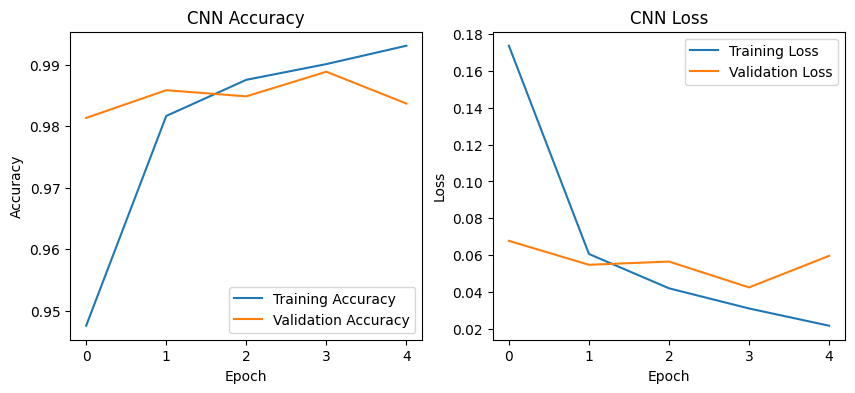

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocessing
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=5,
    validation_split=0.1
)

# ===== Plot history =====
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil
Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

Epoch 1/5
1688/1688 - 51s - 30ms/step - accuracy: 0.9584 - loss: 0.1345 - val_accuracy: 0.9870 - val_loss: 0.0472
Epoch 2/5
1688/1688 - 46s - 28ms/step - accuracy: 0.9865 - loss: 0.0442 - val_accuracy: 0.9893 - val_loss: 0.0420
Epoch 3/5
1688/1688 - 102s - 60ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9895 - val_loss: 0.0405
Epoch 4/5
1688/1688 - 72s - 42ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9900 - val_loss: 0.0418
Epoch 5/5
1688/1688 - 80s - 47ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9892 - val_loss: 0.0430
Test Accuracy: 0.9898


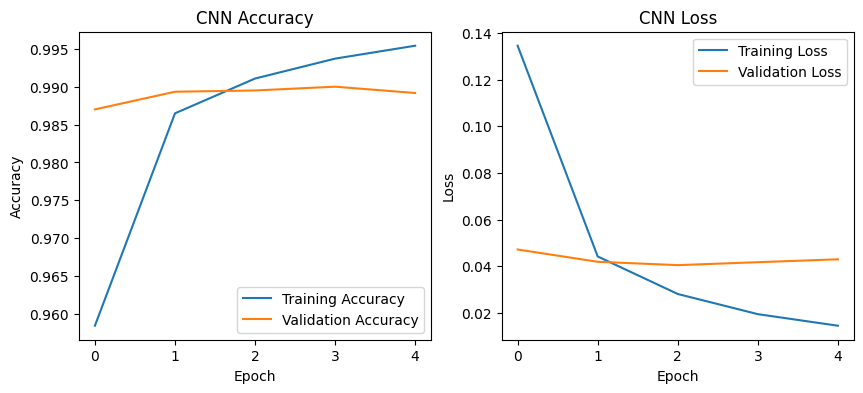

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Model CNN dengan tambahan Conv2D
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Tambahan lapisan Conv2D
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=5,
    validation_split=0.1,
    verbose=2
)

# Evaluasi di test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# ===== Plot history =====
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)
MNIST mudah. Sekarang mari coba CIFAR-10, yang berisi gambar berwarna (mobil, pesawat, anjing, kucing, dll). Ini membuat model CNN bekerja lebih keras.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.3728 - loss: 1.7175 - val_accuracy: 0.5566 - val_loss: 1.2348
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.5909 - loss: 1.1643 - val_accuracy: 0.6272 - val_loss: 1.0853
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.6377 - loss: 1.0317 - val_accuracy: 0.6480 - val_loss: 1.0248
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.6715 - loss: 0.9401 - val_accuracy: 0.6532 - val_loss: 1.0071
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.6952 - loss: 0.8768 - val_accuracy: 0.6836 - val_loss: 0.9270
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.7164 - loss: 0.8143 - val_accuracy: 0.6982 - val_loss: 0.9006
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7399 - loss: 0.7479 - val_accuracy: 0.6880 - val_loss: 0.9144
Epoch 8/10
1407/1407 ━━

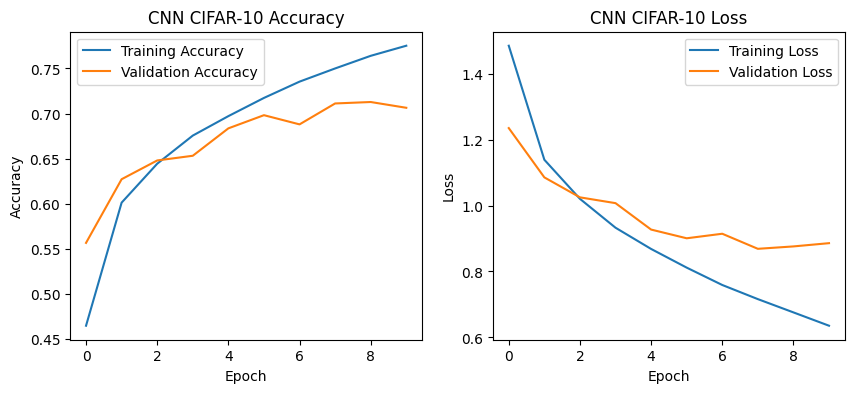

In [8]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas Kecil
Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Bangun model CNN dengan Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),                      # Tambahan Dropout
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.2891 - loss: 1.9127 - val_accuracy: 0.5096 - val_loss: 1.3699
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.4721 - loss: 1.4699 - val_accuracy: 0.5888 - val_loss: 1.1928
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5245 - loss: 1.3280 - val_accuracy: 0.6322 - val_loss: 1.0998
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.5472 - loss: 1.2545 - val_accuracy: 0.6496 - val_loss: 1.0393
Epoch 5/10


## Praktikum D5 - Transfer Learning dengan Model Pra-Latih
Bagaimana jika kita gunakan "otak" yang sudah cerdas? Misalnya VGG16 atau ResNet50 yang sudah dilatih di ImageNet. Kita tinggal memanfaatkannya.

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas Kecil
Coba aktifkan 1-2 lapisan terkahir dari base_model (fine-tuning). Bagaimana akurasinya berubah?

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Base model VGG16 tanpa top layer
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))

# Pertama, freeze semua layer
base_model.trainable = True
for layer in base_model.layers[:-2]:   # Bekukan semua kecuali 2 lapisan terakhir
    layer.trainable = False

# Bangun model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning + Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning + Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Tugas Kecil
Dari confusion matrix, identifikasi kelas apa yang paling sering salah diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi